### CNN for MNIST Handwritten Digit Classification

In [22]:
import tensorflow as tf
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
(train_x, y_train), (test_x, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Size of training Data Loaded:\n")
print('Train: X=%s, y=%s' % (train_x.shape, y_train.shape))
print('Test: X=%s, y=%s' % (test_x.shape, y_test.shape))

Size of training Data Loaded:

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))
test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [5]:
#printing the shapes 
print("--------------------------------------\n")
print("Size of training Data Reshaped:\n")
print('Train: X=%s, y=%s' % (train_x.shape, y_train.shape))
print('Test: X=%s, y=%s' % (test_x.shape, y_test.shape))

--------------------------------------

Size of training Data Reshaped:

Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


In [6]:
print("Normalaising the Dataset. \n")

train_x = train_x.astype('float')/255
test_x = test_x.astype('float')/255
shape = train_x.shape[1:]

Normalaising the Dataset. 



In [7]:
print("CNN Model Creation \n")

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(48, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

CNN Model Creation 



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

print("Training Started.\n")
history = model.fit(train_x, y_train, epochs=5, batch_size = 128, validation_split = 0.2)
print("Training Finished.\n")

Training Started.

Epoch 1/5
375/375 [==============================] - 20s 49ms/step - loss: 0.2720 - accuracy: 0.9141 - val_loss: 0.0713 - val_accuracy: 0.9795
Epoch 2/5
375/375 [==============================] - 18s 49ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0435 - val_accuracy: 0.9867
Epoch 3/5
375/375 [==============================] - 18s 48ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 4/5
375/375 [==============================] - 18s 49ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.0375 - val_accuracy: 0.9890
Epoch 5/5
375/375 [==============================] - 17s 47ms/step - loss: 0.0423 - accuracy: 0.9860 - val_loss: 0.0325 - val_accuracy: 0.9902
Training Finished.



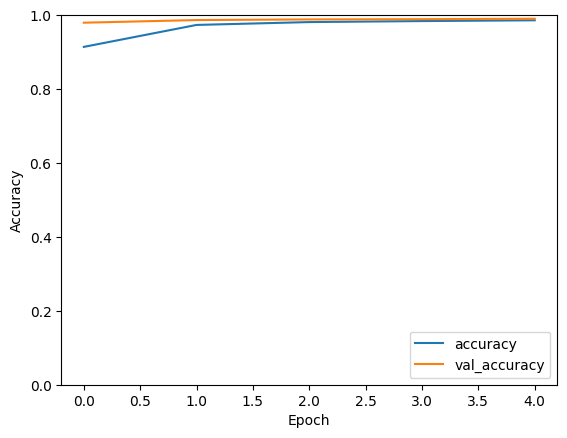

In [10]:
# Plot and save accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

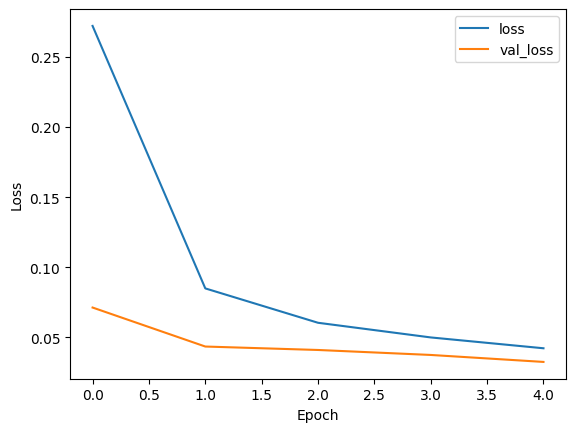

In [11]:
# Plot and save loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [12]:
print("Model Evalutaion Phase.\n")
loss,accuracy= model.evaluate(test_x, y_test)
print(f'Accuracy: {round(accuracy*100,2)}')

Model Evalutaion Phase.

313/313 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9921
Accuracy: 99.21


In [13]:
# Save the model
model.save('mnist_cnn_model.h5')
print("Model saved successfully.")

Model saved successfully.


d:\STUDY\Sem3\deeplearning\DLENV\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# Load the saved model
mnist_model = tf.keras.models.load_model('mnist_cnn_model.h5')

def predict_digit(file_path):
    # Load the image using PIL
    image = Image.open(file_path)
    
    # Convert the image to grayscale
    image = image.convert('L')
    
    # Resize the image to 28x28 (same as MNIST dataset)
    image = image.resize((28, 28))
    
    # Convert image to array
    image_array = np.array(image)
    
    # Reshape and normalize the image (similar to training data)
    processed_image = image_array.reshape((1, 28, 28, 1))
    processed_image = processed_image.astype('float32') / 255.0
    
    # Make predictions using the loaded model
    prediction = mnist_model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    
    return predicted_class



In [29]:
# Example usage for prediction
file_path = r'D:\STUDY\Sem3\deeplearning\Multitasking_app\mnistdata\4d5aaad749292d65343b4a642c01f4e0c9f0d15c.png'
predicted_digit = predict_digit(file_path)
print(f"Predicted digit: {predicted_digit}")

1/1 [==============================] - 0s 37ms/step
Predicted digit: 4
